<a href="https://colab.research.google.com/github/abhiyantaabhishek/test/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Test_data.zip

In [3]:
!ls Test_data/

Sample_Submission.csv  Test  Train  Val


In [4]:
!mv Test_data/Sample_Submission.csv Sample_Submission.csv

In [5]:
drive.flush_and_unmount()

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix
import cv2

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ( EarlyStopping, ModelCheckpoint,ReduceLROnPlateau)
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import tensorflow as tf

In [7]:
classess = os.listdir("Test_data/Train/")
classess

['truck', 'animal', 'car', 'human', 'airplane']

In [8]:
for class_ in classess:
  img_path = os.path.join("Test_data/Train/",class_)
  print( "No of Img Train:", len(os.listdir(img_path)),',',class_)

No of Img Train: 194 , truck
No of Img Train: 194 , animal
No of Img Train: 194 , car
No of Img Train: 194 , human
No of Img Train: 194 , airplane


In [9]:
for class_ in classess:
  img_path = os.path.join("Test_data/Val/",class_)
  print( "No of Img Val:", len(os.listdir(img_path)),',',class_)

No of Img Val: 582 , truck
No of Img Val: 582 , animal
No of Img Val: 582 , car
No of Img Val: 582 , human
No of Img Val: 582 , airplane


In [14]:
train_images = []
train_labels = []
val_images = []
val_labels = []
test_images = []
test_labels = []

for root, dirs, files in os.walk("Test_data"):
   for name in files:
      full_path = os.path.join(root, name)
      data_type = full_path.split(os.sep)[1]
      img = plt.imread(full_path)
      if(data_type == "Train"):
        label = full_path.split(os.sep)[2]
        train_images.append(img)
        train_labels.append(label)
      elif ( data_type == "Val"):
        label = full_path.split(os.sep)[2]
        val_images.append(img)
        val_labels.append(label)
      else:
        test_images.append(img)

In [15]:
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)
lb = LabelBinarizer()
lb.fit(train_labels)
print(lb.classes_)
train_label_onehot = lb.transform(train_labels)
val_label_onehot = lb.transform(val_labels)

['airplane' 'animal' 'car' 'human' 'truck']


In [16]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
assert len(train_images) == len(train_labels)
assert len(val_images) == len(val_labels)

(970, 96, 96)
(2910, 96, 96)
(1940, 96, 96)


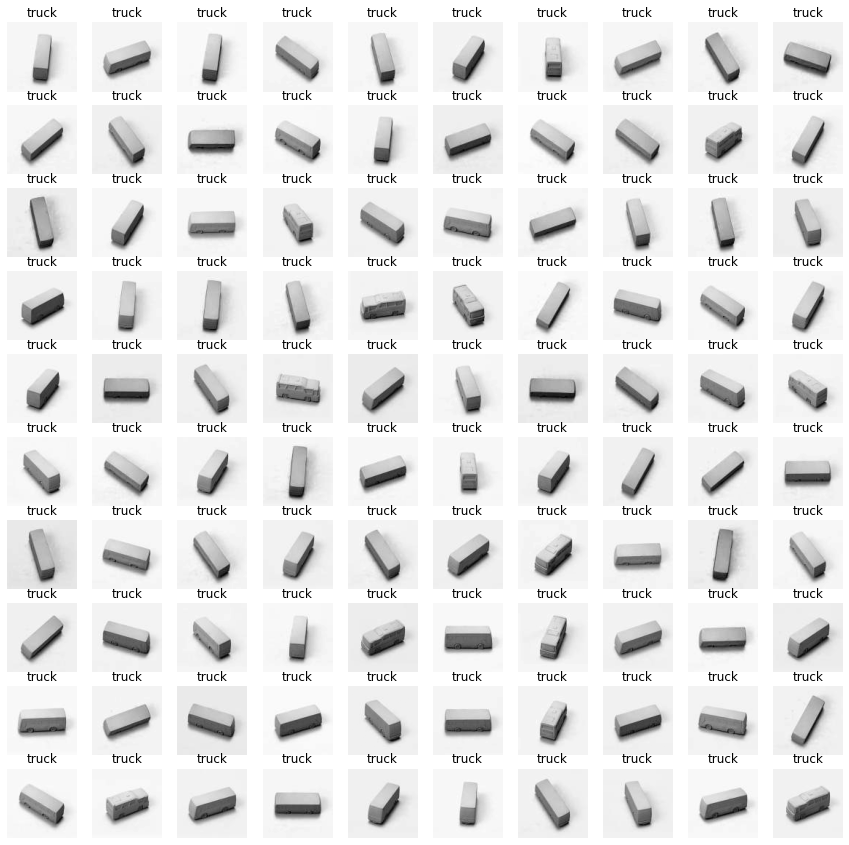

In [20]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[i*10+j].argmax()])
    axs[i,j].axis('off')


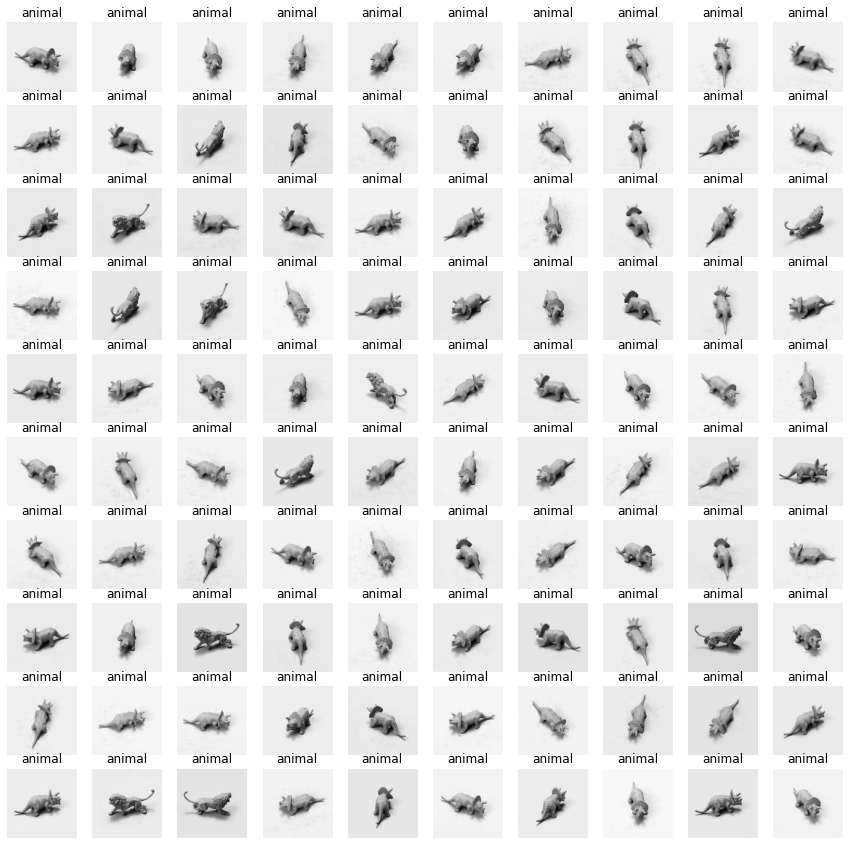

In [19]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[200+i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[200+i*10+j].argmax()])
    axs[i,j].axis('off')


10


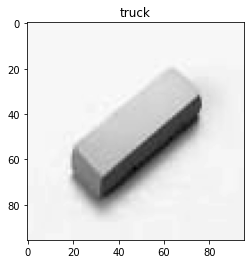

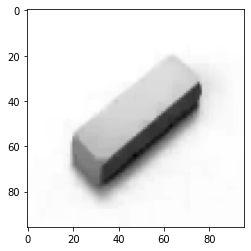

In [25]:

ind = 10
print(ind)
img = train_images[ind]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.imshow(img,cmap=plt.cm.gray)
plt.title(lb.classes_[train_label_onehot[ind].argmax()])
plt.show()

plt.imshow(opening,cmap=plt.cm.gray)
plt.show()

In [32]:
for ind in range (len(train_images)):
  img = train_images[ind]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
  opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  train_images[ind] = opening
for ind in range (len(val_images)):
  img = val_images[ind]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
  opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  val_images[ind] = opening
for ind in range (len(test_images)):
  img = test_images[ind]
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
  opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
  test_images[ind] = opening

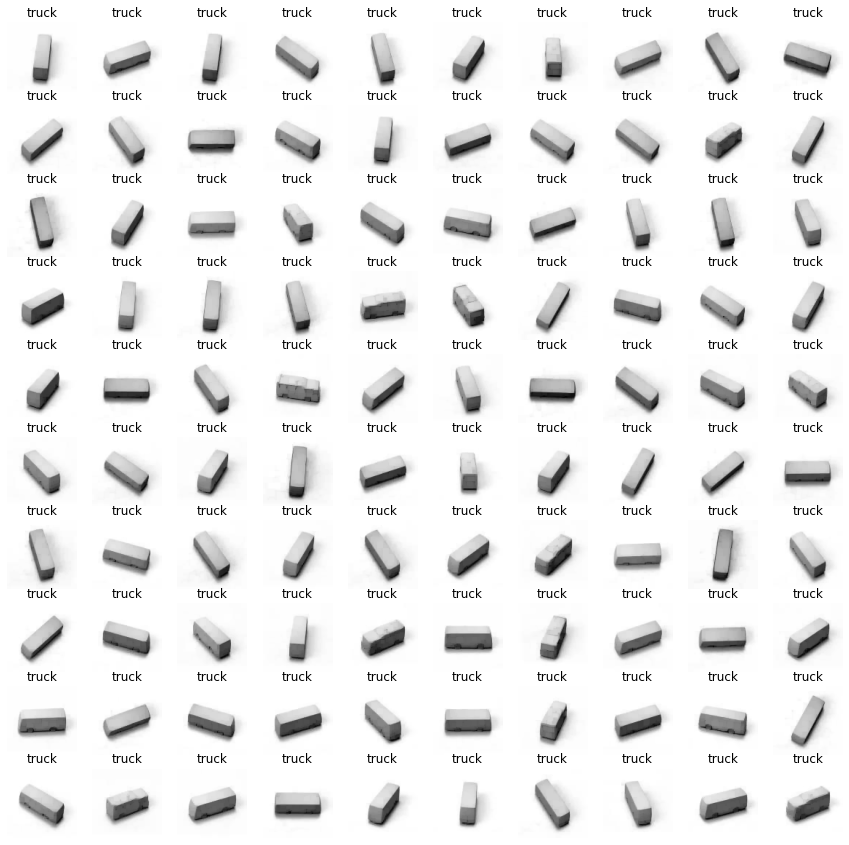

In [33]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[i*10+j].argmax()])
    axs[i,j].axis('off')

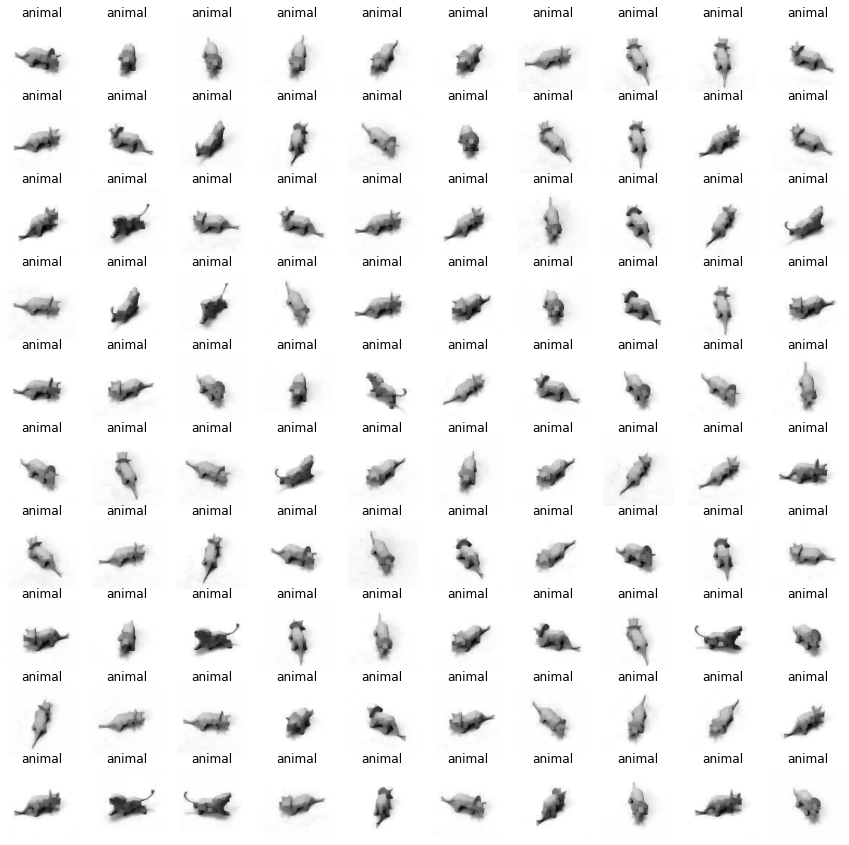

In [34]:
fig, axs = plt.subplots(10, 10,figsize=(15,15))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(train_images[200+i*10+j],cmap=plt.cm.gray)
    axs[i,j].set_title(lb.classes_[train_label_onehot[200+i*10+j].argmax()])
    axs[i,j].axis('off')


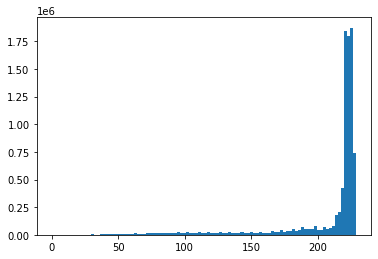

In [35]:
hist = plt.hist(train_images.flatten(),bins=100)

In [36]:
train_images_normalised = (train_images-train_images.mean())/train_images.std()
val_images_normalised = (val_images-val_images.mean())/val_images.std()

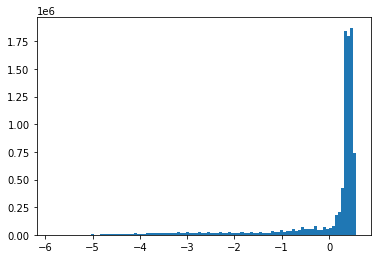

In [37]:
hist = plt.hist(train_images_normalised.flatten(),bins=100)

In [38]:
Augmented_training = ImageDataGenerator(rotation_range=90,
                                        fill_mode='nearest',
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1)

In [44]:
checkpoint = ModelCheckpoint("model_{epoch:02d}",monitor='val_loss',verbose=1,save_best_only=True)
adaptiveLearningRate = ReduceLROnPlateau(monitor='loss',factor=0.1,patience=5,verbose=1,min_delta=0.0001)
earlyStopping = EarlyStopping(monitor='loss',mode='auto',verbose=1,patience=25)
callback_list = [checkpoint,adaptiveLearningRate,earlyStopping]

In [20]:

def get_model(input_shape,num_of_class,hidden_size=64,dropout=0.5):
  input = tf.keras.Input(shape=(96,96,1))
  x = L.Conv2D(filters=32,kernel_size=(3,3),strides=(1,1))(input)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x)
  x = L.MaxPool2D(pool_size=(2,2))(x)

  x = L.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1))(x)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x)
  x = L.MaxPool2D(pool_size=(2,2))(x)

  x = L.Conv2D(filters=128,kernel_size=(3,3),strides=(1,1))(x)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x)
  x = L.MaxPool2D(pool_size=(2,2))(x)

  x = L.Flatten()(x)
  x = L.Dense(hidden_size)(x)
  x = L.BatchNormalization()(x)
  x = L.Activation('relu')(x)
  x = L.Dropout(dropout)(x)
  x = L.Dense(num_of_class,activation="softmax")(x)
  model = tf.keras.Model(input,x)
  return model

In [21]:
input_shape = (96,96,1)
num_of_class = len(lb.classes_)
K.clear_session()
model=get_model(input_shape,num_of_class)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 94, 94, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 45, 45, 64)        256   

In [22]:
len(np.expand_dims(train_images_normalised,3))//64*50

750

In [23]:

BATCH_SIZE = 32
EPOCHS = 50
model.fit(
    Augmented_training.flow(np.expand_dims(train_images_normalised,3),train_label_onehot,batch_size=BATCH_SIZE),
    steps_per_epoch = len(np.expand_dims(train_images_normalised,3))//BATCH_SIZE,
    validation_data = (val_images_normalised,val_label_onehot),
    validation_steps=len(val_images_normalised)//BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = callback_list
)

Epoch 1/50
30/30 [==============================] - 34s 108ms/step - loss: 1.7243 - categorical_accuracy: 0.3475 - val_loss: 1.5995 - val_categorical_accuracy: 0.2612

Epoch 00001: val_loss improved from inf to 1.59955, saving model to model_01
INFO:tensorflow:Assets written to: model_01/assets
Epoch 2/50
30/30 [==============================] - 1s 47ms/step - loss: 1.2439 - categorical_accuracy: 0.5224
Epoch 3/50
30/30 [==============================] - 1s 48ms/step - loss: 1.0524 - categorical_accuracy: 0.5959
Epoch 4/50
30/30 [==============================] - 1s 48ms/step - loss: 0.9636 - categorical_accuracy: 0.6258
Epoch 5/50
30/30 [==============================] - 1s 48ms/step - loss: 0.8548 - categorical_accuracy: 0.6844
Epoch 6/50
30/30 [==============================] - 1s 48ms/step - loss: 0.8284 - categorical_accuracy: 0.6866
Epoch 7/50
30/30 [==============================] - 1s 49ms/step - loss: 0.7041 - categorical_accuracy: 0.7431
Epoch 8/50
30/30 [====================

In [24]:
BATCH_SIZE = 32
EPOCHS = 50
model.fit(
    Augmented_training.flow(np.expand_dims(val_images_normalised,3),val_label_onehot,batch_size=BATCH_SIZE),
    steps_per_epoch = len(np.expand_dims(val_images_normalised,3))//BATCH_SIZE,
    validation_data = (train_images_normalised,train_label_onehot),
    validation_steps=len(train_images_normalised)//BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = callback_list
)

Epoch 1/50
90/90 [==============================] - 5s 56ms/step - loss: 1.4844 - categorical_accuracy: 0.4972 - val_loss: 1.5994 - val_categorical_accuracy: 0.5175

Epoch 00001: val_loss improved from 1.59955 to 1.59944, saving model to model_01
INFO:tensorflow:Assets written to: model_01/assets
Epoch 2/50
90/90 [==============================] - 4s 49ms/step - loss: 0.9313 - categorical_accuracy: 0.6435 - val_loss: 1.1534 - val_categorical_accuracy: 0.5732

Epoch 00002: val_loss improved from 1.59944 to 1.15343, saving model to model_02
INFO:tensorflow:Assets written to: model_02/assets
Epoch 3/50
90/90 [==============================] - 4s 49ms/step - loss: 0.7741 - categorical_accuracy: 0.7140 - val_loss: 1.0935 - val_categorical_accuracy: 0.5680

Epoch 00003: val_loss improved from 1.15343 to 1.09349, saving model to model_03
INFO:tensorflow:Assets written to: model_03/assets
Epoch 4/50
90/90 [==============================] - 4s 49ms/step - loss: 0.6657 - categorical_accuracy: 0.

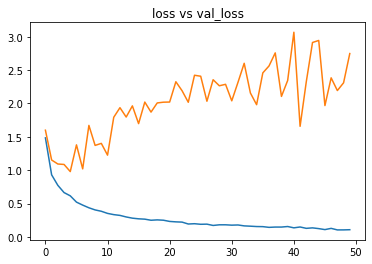

In [25]:
fig=plt.figure()
plt.plot(model.history.history["loss"],label="loss")
plt.plot(model.history.history["val_loss"],label="val_loss")
plt.title("loss vs val_loss")
plt.show()

In [26]:
prediction = model.predict(train_images_normalised)
print(classification_report(train_label_onehot.argmax(axis=1),prediction.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

    airplane       0.96      0.81      0.88       194
      animal       1.00      0.07      0.13       194
         car       0.57      0.10      0.17       194
       human       0.49      1.00      0.66       194
       truck       0.51      0.95      0.66       194

    accuracy                           0.59       970
   macro avg       0.71      0.59      0.50       970
weighted avg       0.71      0.59      0.50       970



In [27]:
prediction = model.predict(val_images_normalised)
print(classification_report(val_label_onehot.argmax(axis=1),prediction.argmax(axis=1),target_names=lb.classes_))

              precision    recall  f1-score   support

    airplane       1.00      0.85      0.92       582
      animal       1.00      0.81      0.90       582
         car       1.00      0.62      0.76       582
       human       0.82      0.99      0.90       582
       truck       0.67      1.00      0.80       582

    accuracy                           0.86      2910
   macro avg       0.90      0.86      0.86      2910
weighted avg       0.90      0.86      0.86      2910



In [28]:
K.clear_session()
resnet = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=5)

234708992/234698864 [==============================] - 3s 0us/step


In [ ]:
resnet.summary()

In [ ]:
tf.keras.utils.plot_model(resnet, to_file='model.png', show_shapes=True)

In [ ]:
resnet.predict(np.expand_dims(val_images_normalised,3))

In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [45]:
def ResNet34(shape = (32, 32, 3), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [46]:
K.clear_session()
resnet = ResNet34(shape = (96, 96, 1), classes = 5)

In [ ]:
tf.keras.utils.plot_model(resnet, to_file='model.png', show_shapes=True)

In [ ]:
resnet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())
resnet.summary()

In [ ]:
BATCH_SIZE = 32
EPOCHS = 50
resnet.fit(
    Augmented_training.flow(np.expand_dims(val_images_normalised,3),val_label_onehot,batch_size=BATCH_SIZE),
    steps_per_epoch = len(np.expand_dims(val_images_normalised,3))//BATCH_SIZE,
    validation_data = (train_images_normalised,train_label_onehot),
    validation_steps=len(train_images_normalised)//BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = callback_list
)

Epoch 1/50
11/90 [==>...........................] - ETA: 6:19 - loss: 1.7909 - categorical_accuracy: 0.2642

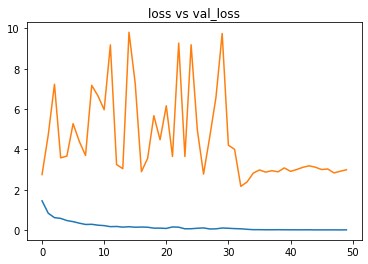

In [46]:
fig=plt.figure()
plt.plot(resnet.history.history["loss"],label="loss")
plt.plot(resnet.history.history["val_loss"],label="val_loss")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
model.fit(
    Augmented_training.flow(np.expand_dims(val_images_normalised,3),val_label_onehot,batch_size=BATCH_SIZE),
    steps_per_epoch = len(np.expand_dims(val_images_normalised,3))//BATCH_SIZE,
    validation_data = (train_images_normalised,train_label_onehot),
    validation_steps=len(train_images_normalised)//BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = callback_list
)

In [1]:
for ind, img in enumerate(train_images[0:10]):
  print(ind)
  plt.imshow(img)
  plt.title(lb.classes_( val_label_onehot[ind].argmax()))

NameError: ignored